In [1]:
import pandas as pd
import Technic as tc
from Technic import TSFM

In [2]:
# pip freeze > requirements.txt

## Internal Data Loader

In [3]:
df_internal_raw = pd.read_excel('fake_internal.xlsx')
df_internal_raw.head()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
0,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600
1,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520
2,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023
3,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759
4,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131


In [4]:
df_internal_raw['VR_balance_GR'] = df_internal_raw['VR_balance'].pct_change()

In [5]:
ID_config = {
    'in_sample_start':"2018-02-28",
    'in_sample_end':"2022-12-31",
    'full_sample_end':"2023-11-30",
    'scen_p0':"2022-12-31",
}
IDLoader = tc.PPNRInternalLoader(**ID_config)
IDLoader.load(df_internal_raw, date_col='Date')

In [6]:
IDLoader.internal_data.tail()

,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,VR_balance_GR
Date,,,,,,,
2023-07-31,2489.052561,0.033147,2518.590119,0.053016,2289.250500,0.035404,0.008653
2023-08-31,2509.747182,0.046901,2582.117434,0.050611,2314.268164,0.011812,0.010928
2023-09-30,2516.131131,0.050095,2612.826339,0.033226,2336.076344,0.024985,0.009423
2023-10-31,2532.723351,0.051663,2649.181996,0.039805,2352.850746,0.035034,0.007181
2023-11-30,2556.873350,0.051585,2683.722013,0.026095,2374.657724,0.030125,0.009268


## Mev Loader

In [7]:
mev_load = {
    'model_mev_source': {'fake_scens.xlsx': 'base'},
    'scen_mevs_source': {
        'fake_scens.xlsx': {'base':'base', 'adv':'adv', 'sev':'sev'}
    } 
}
mev_ldr = tc.MEVLoader()
mev_ldr.load(
    source='fake_scens.xlsx',
    sheet='base'
)

mev_ldr.load_scens(
    source='fake_scens.xlsx',
    scens={
        'Base': 'base',
        'Adv': 'adv',
        'Sev': 'sev'
    },
    set_name='EWST2024'
)

In [8]:
mev_ldr.model_mev_qtr

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [9]:
mev_ldr.model_mev_mth

""


In [10]:
mev_ldr.scen_mev_qtr['EWST2024']['Base']

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [11]:
mev_ldr.mev_map

{'NGDP': {'type': 'level', 'description': 'Nominal GDP', 'category': None},
 'PSR': {'type': 'rate',
  'description': 'Personal Savings Rate',
  'category': None},
 'PDI': {'type': 'level',
  'description': 'Personal Disposable Income',
  'category': None},
 'UNRATE': {'type': 'rate',
  'description': 'Unemployment Rate',
  'category': None},
 'CPI': {'type': 'rate',
  'description': 'Consumer Price Index',
  'category': None}}

## Data Manager

In [12]:
dm_config = {
    'internal_loader': IDLoader,
    'mev_loader': mev_ldr,
}
dm = tc.DataManager(**dm_config)

In [13]:
dm.internal_in.head()

,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,VR_balance_GR
Date,,,,,,,
2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520,0.018884
2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023,0.022306
2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759,0.025929
2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131,0.017233
2018-06-30,1599.492411,0.021060,920.614490,0.050508,1130.304390,0.011438,0.016941


In [14]:
dm.model_mev

,NGDP,PSR,PDI,UNRATE,CPI,M,Q
2000-01-31,100.492684,10047.893288,8052.188324,3.052221,3.067151,1,1
2000-02-29,100.348129,10037.961597,8050.619573,3.314907,3.238625,2,1
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,3,1
2000-04-30,99.977577,10027.408818,8044.386319,3.955085,2.922795,4,2
2000-05-31,99.823237,10016.763473,8042.717524,4.235644,3.107973,5,2
...,...,...,...,...,...,...,...
2030-08-31,104.712858,10580.596987,8335.080727,5.975244,3.566088,8,3
2030-09-30,104.760000,10546.660000,8319.090000,6.610000,3.770000,9,3
2030-10-31,104.848055,10515.420648,8304.242733,6.829511,4.323440,10,4
2030-11-30,104.944511,10492.477194,8293.092475,6.754834,4.966001,11,4


In [15]:
dm.scen_mevs['EWST2024']['Base']

,NGDP,PSR,PDI,UNRATE,CPI,M,Q
2000-01-31,100.492684,10047.893288,8052.188324,3.052221,3.067151,1,1
2000-02-29,100.348129,10037.961597,8050.619573,3.314907,3.238625,2,1
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,3,1
2000-04-30,99.977577,10027.408818,8044.386319,3.955085,2.922795,4,2
2000-05-31,99.823237,10016.763473,8042.717524,4.235644,3.107973,5,2
...,...,...,...,...,...,...,...
2030-08-31,104.712858,10580.596987,8335.080727,5.975244,3.566088,8,3
2030-09-30,104.760000,10546.660000,8319.090000,6.610000,3.770000,9,3
2030-10-31,104.848055,10515.420648,8304.242733,6.829511,4.323440,10,4
2030-11-30,104.944511,10492.477194,8293.092475,6.754834,4.966001,11,4


In [16]:
# Build Search Vars
var_lst = ['VR_price', 'NGDP', 'PDI']
df_dict = dm.build_search_vars(var_lst)
df_dict


e:\OneDrive\Git\Project_LEGO\Technic\data.py:1040: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


{'VR_price':             VR_price
 Date                
 2018-01-31  0.045600
 2018-02-28  0.023520
 2018-03-31  0.025023
 2018-04-30  0.013759
 2018-05-31  0.033131
 ...              ...
 2023-07-31  0.035404
 2023-08-31  0.011812
 2023-09-30  0.024985
 2023-10-31  0.035034
 2023-11-30  0.030125
 
 [71 rows x 1 columns],
 'NGDP':                NGDP_LV  NGDP_MMGR
 2000-01-31  100.492684        NaN
 2000-02-29  100.348129  -0.001438
 2000-03-31  100.160000  -0.001875
 2000-04-30   99.977577  -0.001821
 2000-05-31   99.823237  -0.001544
 ...                ...        ...
 2030-08-31  104.712858   0.000127
 2030-09-30  104.760000   0.000450
 2030-10-31  104.848055   0.000841
 2030-11-30  104.944511   0.000920
 2030-12-31  105.020000   0.000719
 
 [372 rows x 2 columns],
 'PDI':                  PDI_LV  PDI_MMGR
 2000-01-31  8052.188324       NaN
 2000-02-29  8050.619573 -0.000195
 2000-03-31  8047.460000 -0.000392
 2000-04-30  8044.386319 -0.000382
 2000-05-31  8042.717524 -0.000207
 ...

In [17]:
dm.model_mev['NGDP']

2000-01-31    100.492684
2000-02-29    100.348129
2000-03-31    100.160000
2000-04-30     99.977577
2000-05-31     99.823237
                 ...    
2030-08-31    104.712858
2030-09-30    104.760000
2030-10-31    104.848055
2030-11-30    104.944511
2030-12-31    105.020000
Freq: M, Name: NGDP, Length: 372, dtype: float64

In [18]:
# Apply to MEVs
def new_features(df_mev, df_in):
    df_mev['NGDP-Price'] =  df_mev['NGDP'] - df_in['VR_price']
    df_mev['PDI-FixBal'] =  df_mev['PDI'] - df_in['Fixed_balance']

    df_in['VR_Bal-Price'] =  df_in['VR_balance'] - df_in['VR_price']
    df_in['Fixed_Bal-Price'] =  df_in['Fixed_balance'] - df_in['Fixed_price']

    return df_mev, df_in

dm.apply_to_all(new_features)

e:\OneDrive\Git\Project_LEGO\Technic\data.py:1391: UserWarning: No scenario internal data found. For scenario MEV updates, the main internal data is used as context; internal scenario updates are skipped.
  warnings.warn(


In [19]:
dm.model_mev.dropna()

,NGDP,PSR,PDI,UNRATE,CPI,M,Q,NGDP-Price,PDI-FixBal
2018-01-31,103.025249,10252.993643,8174.638090,4.552795,4.264135,1,1,102.979649,6648.871834
2018-02-28,103.046777,10283.227034,8181.637653,5.961332,5.269250,2,1,103.023257,6641.122180
2018-03-31,103.050000,10317.070000,8191.440000,6.980000,6.980000,3,1,103.024977,6624.972021
2018-04-30,103.012962,10338.592901,8202.088796,6.546695,8.690724,4,2,102.999203,6638.959033
2018-05-31,102.952276,10345.066305,8208.387253,5.216383,9.773928,5,2,102.919145,6624.504172
...,...,...,...,...,...,...,...,...,...
2023-07-31,103.796679,10317.677642,8256.675701,7.512735,3.334155,7,3,103.761276,5767.623140
2023-08-31,103.900526,10301.156371,8224.351573,7.035848,4.198376,8,3,103.888714,5714.604392
2023-09-30,103.870000,10320.710000,8199.060000,6.120000,5.210000,9,3,103.845015,5682.928869
2023-10-31,103.646070,10386.819893,8192.848776,4.810268,5.843201,10,4,103.611035,5660.125425


In [20]:
dm._mev_loader.scen_mev_qtr['EWST2024']['Base'].dropna()

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [21]:
dm.scen_mevs['EWST2024']['Sev'].dropna()

,NGDP,PSR,PDI,UNRATE,CPI,M,Q,NGDP-Price,PDI-FixBal
2018-01-31,123.628335,9227.690845,9809.573241,4.096801,5.122003,1,1,123.582735,8283.806985
2018-02-28,123.655034,9254.901513,9817.971255,5.363644,6.322449,2,1,123.631515,8277.455781
2018-03-31,123.660000,9285.360000,9829.730000,6.280000,8.370000,3,1,123.634977,8263.262021
2018-04-30,123.616117,9304.728982,9842.503131,5.890569,10.421839,4,2,123.602358,8279.373368
2018-05-31,123.543272,9310.552874,9850.056366,4.694500,11.723791,5,2,123.510140,8266.173285
...,...,...,...,...,...,...,...,...,...
2023-07-31,124.564109,9285.917379,9908.013791,6.763720,3.997851,7,3,124.528705,7418.961230
2023-08-31,124.688705,9271.045085,9869.221516,6.333844,5.035452,8,3,124.676893,7359.474335
2023-09-30,124.650000,9288.640000,9838.870000,5.510000,6.250000,9,3,124.625015,7322.738869
2023-10-31,124.377333,9348.136944,9831.417643,4.333366,7.009335,10,4,124.342298,7298.694292


In [22]:
dm._internal_loader.in_sample_end

Timestamp('2022-12-31 00:00:00')

In [23]:
dm.poos_dms['poos_dm_3']._internal_loader.in_sample_end

Timestamp('2022-09-30 00:00:00')

In [24]:
dm.out_sample_idx

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [25]:
dm.poos_dms['poos_dm_12'].out_sample_idx

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

## Model Building

### CM

In [26]:
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance_GR',
    'model_type': tc.Growth,
    'target_base': 'VR_balance',
    'data_manager': dm,
    'model_cls': tc.OLS
}
cm1 = tc.CM(**cm_config)

In [27]:
m_dum = tc.DumVar('M', categories=[2,3,4])
indep_vars = [m_dum, 'NGDP']
cm1.build(indep_vars)

In [28]:
cm1.model_in.testset.all_test_results

{'Fit Measures':            Value
 Metric          
 R²      0.257094
 Adj R²  0.202064,
 'IS Error Measures':            Value
 Metric          
 ME      0.010820
 MAE     0.002809
 RMSE    0.003742,
 'OOS Error Measures':            Value
 Metric          
 ME      0.004692
 MAE     0.002079
 RMSE    0.002558,
 'In-Sample R²': Metric
 R²    0.257094
 Name: In-Sample R², dtype: float64,
 'Coefficient Significance':               P-value  Passed
 Coefficient                  
 M:2          0.039724    True
 M:3          0.121587   False
 M:4          0.876566   False
 NGDP         0.001719    True,
 'Multicollinearity':                VIF
 Variable          
 NGDP      1.357747
 M:2       1.132532
 M:3       1.215653
 M:4       1.146461,
 'Residual Stationarity':       Statistic   P-value  Passed
 Test                             
 ADF   -4.463311  0.000229    True
 PP    -5.118138  0.000013    True,
 'Residual Normality':       Statistic   P-value  Passed
 Test                        

In [29]:
m_dum = tc.DumVar('M', categories=[2,3,4])
indep_vars = [m_dum, 'NGDP']
cm1.build(indep_vars)

In [30]:
m_dum = tc.DumVar('M', categories=[2,3,4])
indep_vars = [m_dum, 'NGDP']
cm1.build(indep_vars)

In [31]:
cm1.model_in.testset.all_test_results['IS Error Measures']

,Value
Metric,
ME,0.010820
MAE,0.002809
RMSE,0.003742


=== In-Sample Performance ===
   R²  Adj R²    ME   MAE  RMSE
0.257   0.202 0.011 0.003 0.004

=== Out-of-Sample Performance ===
   ME   MAE  RMSE
0.005 0.002 0.003

=== Model Parameters ===
Variable        Coef Pvalue  VIF     SE  CI_2_5 CI_97_5
   const      0.7795  0.001  NaN 0.2326  0.3132  1.2459
    NGDP     -0.0074  0.002 1.36 0.0022 -0.0119 -0.0029
     M:2     -0.0047  0.040 1.13 0.0022 -0.0091 -0.0002
     M:3     -0.0041  0.122 1.22 0.0026 -0.0092  0.0011
     M:4 -3.6686e-04  0.877 1.15 0.0024 -0.0051  0.0043


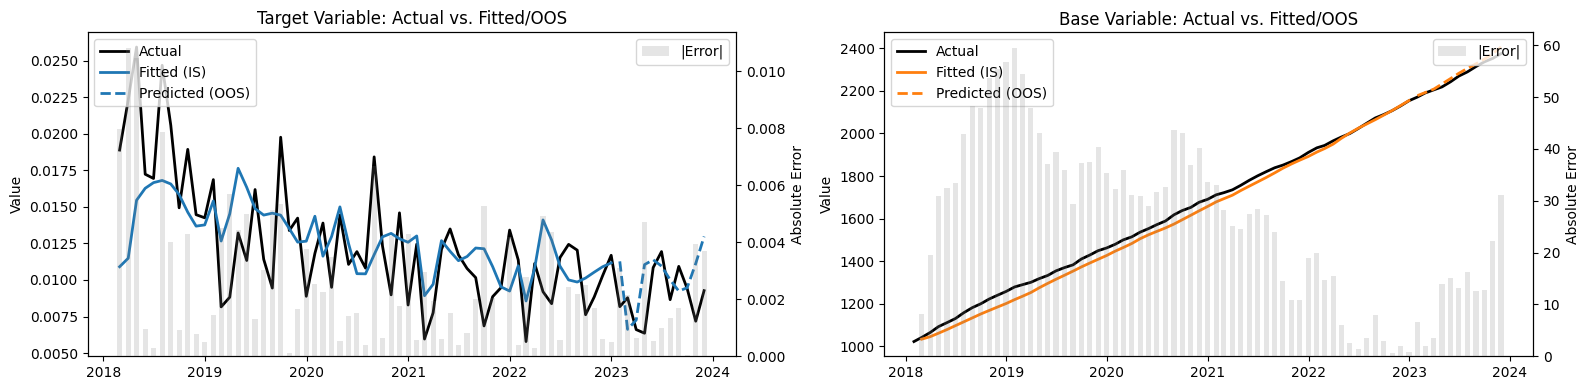


=== Model Testing ===
--- Fit Measures ---
           Value
Metric          
R²      0.257094
Adj R²  0.202064

--- IS Error Measures ---
           Value
Metric          
ME      0.010820
MAE     0.002809
RMSE    0.003742

--- OOS Error Measures ---
           Value
Metric          
ME      0.004692
MAE     0.002079
RMSE    0.002558

--- In-Sample R² ---
Metric
R²    0.257094

--- Coefficient Significance ---
              P-value  Passed
Coefficient                  
M:2          0.039724    True
M:3          0.121587   False
M:4          0.876566   False
NGDP         0.001719    True

--- Multicollinearity ---
               VIF
Variable          
NGDP      1.357747
M:2       1.132532
M:3       1.215653
M:4       1.146461

--- Residual Stationarity ---
      Statistic   P-value  Passed
Test                             
ADF   -4.463311  0.000229    True
PP    -5.118138  0.000013    True

--- Residual Normality ---
      Statistic   P-value  Passed
Test                             
J

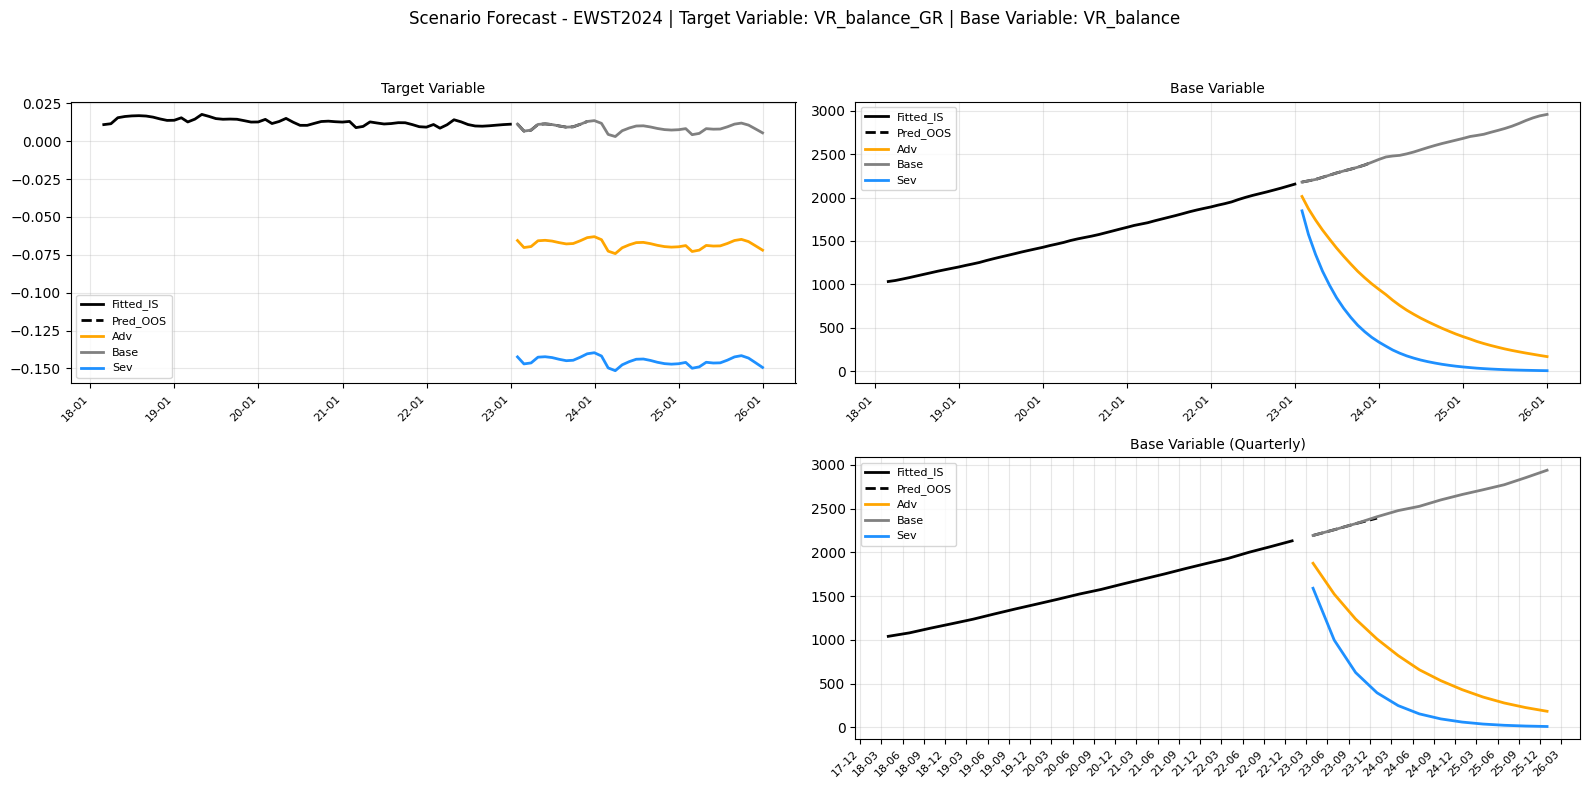

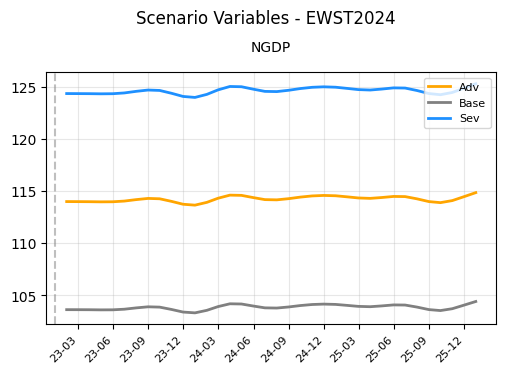


=== Model: cm1 — Sensitivity Analysis ===
Parameter Sensitivity Testing


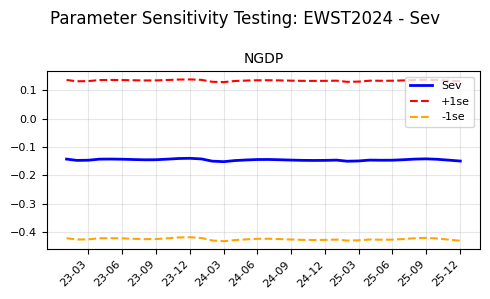

Input Sensitivity Testing


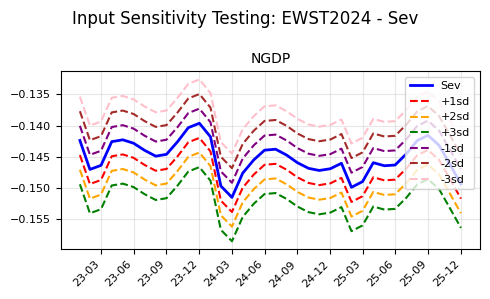


=== Model: cm1 — Model Stability Analysis ===
1. Performance Plots:


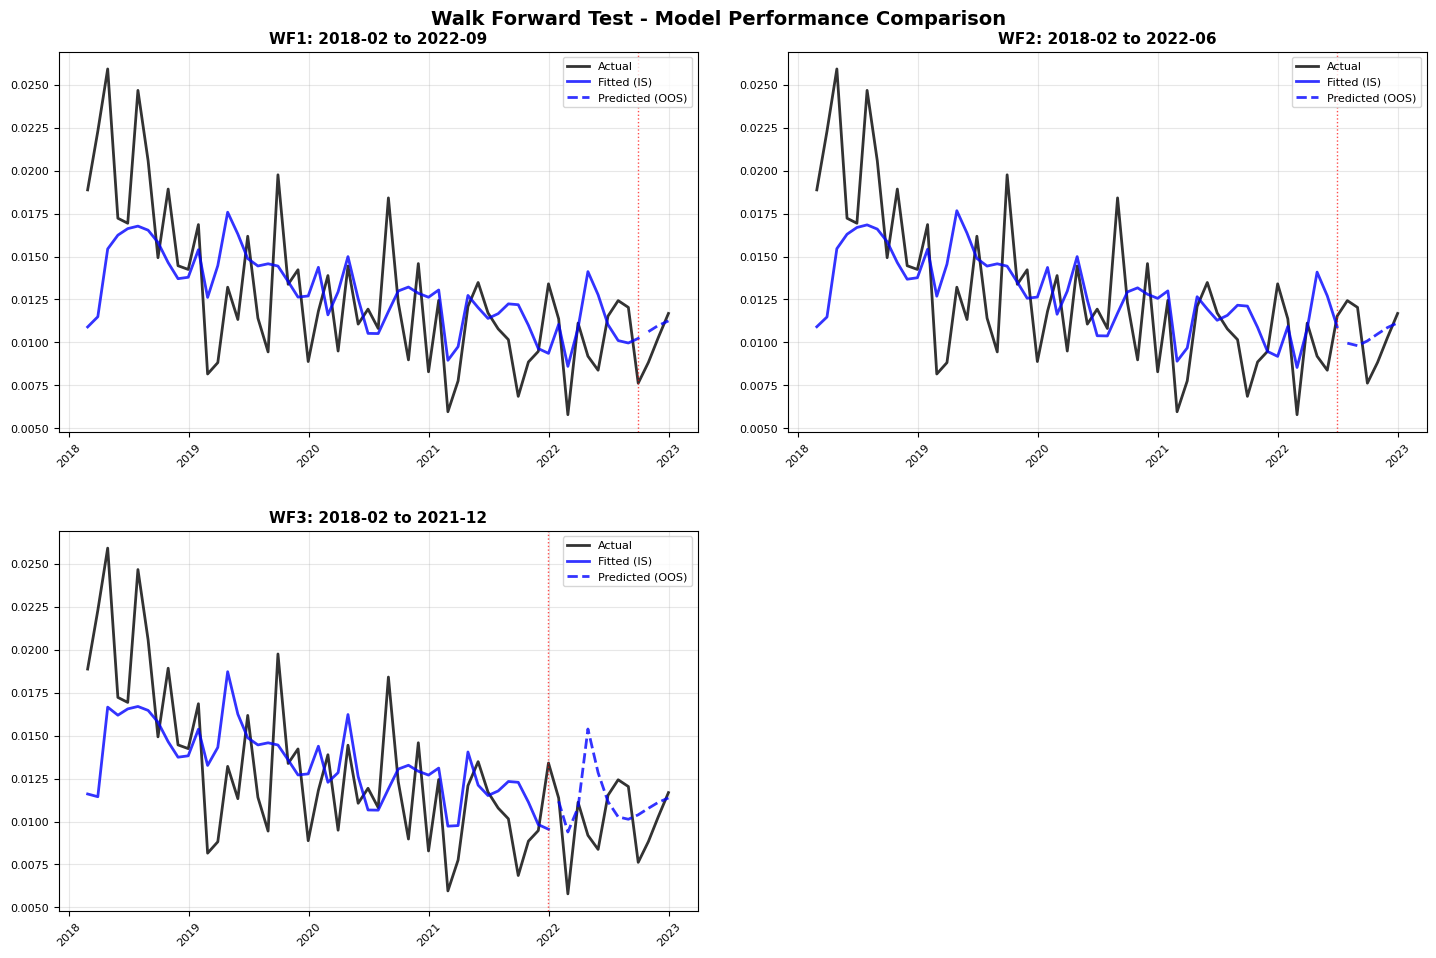


2. Parameter Coefficients Table:
        2022-12   2022-09   2022-06   2021-12
const  0.779530  0.764158  0.789251  0.737861
NGDP  -0.007414 -0.007265 -0.007508 -0.007010

3. Parameter Percentage Change Table:
       2022-09   2022-06   2021-12
const -0.01972  0.012471 -0.053454
NGDP  -0.02011  0.012696 -0.054496

4. P-Values Table:
        2022-12  2022-09   2022-06   2021-12
const  0.001474  0.00241  0.004314  0.013640
NGDP   0.001719  0.00279  0.004914  0.015232

5. Model Performance Comparison:
In-Sample End  PoOS Period  IS R-Square  IS RMSE  OOS RMSE
      2022-12            0     0.257094 0.003742       NaN
      2022-09            3     0.244797 0.003832  0.001139
      2022-06            6     0.240101 0.003899  0.001852
      2021-12           12     0.220414 0.003983  0.002770



In [32]:
cm1.show_report(show_tests=True, show_scens=True, show_sens=True, show_stab=True)

In [33]:
cm1.model_in.y_base_full

Date
2018-01-31    1022.483571
2018-02-28    1041.792249
2018-03-31    1065.030692
2018-04-30    1092.645841
2018-05-31    1111.475074
                 ...     
2023-07-31    2289.250500
2023-08-31    2314.268164
2023-09-30    2336.076344
2023-10-31    2352.850746
2023-11-30    2374.657724
Freq: M, Name: VR_balance, Length: 71, dtype: float64

In [34]:
cm1.model_in.y_base_fitted_in

Date
2018-02-28    1033.634598
2018-03-31    1045.507027
2018-04-30    1061.662995
2018-05-31    1078.935748
2018-06-30    1096.907677
2018-07-31    1115.343457
2018-08-31    1133.818998
2018-09-30    1151.780481
2018-10-31    1168.636468
2018-11-30    1184.625758
2018-12-31    1200.933003
2019-01-31    1219.431889
2019-02-28    1234.873826
2019-03-31    1252.811267
2019-04-30    1274.905620
2019-05-31    1295.727380
2019-06-30    1315.004946
2019-07-31    1333.989746
2019-08-31    1353.423585
2019-09-30    1372.957508
2019-10-31    1391.510104
2019-11-30    1409.025474
2019-12-31    1426.854827
2020-01-31    1447.341246
2020-02-29    1464.168340
2020-03-31    1483.156911
2020-04-30    1505.400251
2020-05-31    1524.199570
2020-06-30    1540.096298
2020-07-31    1556.142770
2020-08-31    1574.392882
2020-09-30    1594.781625
2020-10-31    1615.808304
2020-11-30    1636.516980
2020-12-31    1657.103609
2021-01-31    1678.662570
2021-02-28    1693.641483
2021-03-31    1710.081329
2021-04

In [35]:
cm1.model_in.y_base_pred_out

Date
2023-01-31    2177.879929
2023-02-28    2192.302135
2023-03-31    2208.218849
2023-04-30    2232.621913
2023-05-31    2258.030742
2023-06-30    2282.752835
2023-07-31    2305.601713
2023-08-31    2326.904232
2023-09-30    2348.930181
2023-10-31    2375.064215
2023-11-30    2405.873938
Freq: M, Name: VR_balance, dtype: float64

In [36]:
st_test = cm1.model_in.stability_test

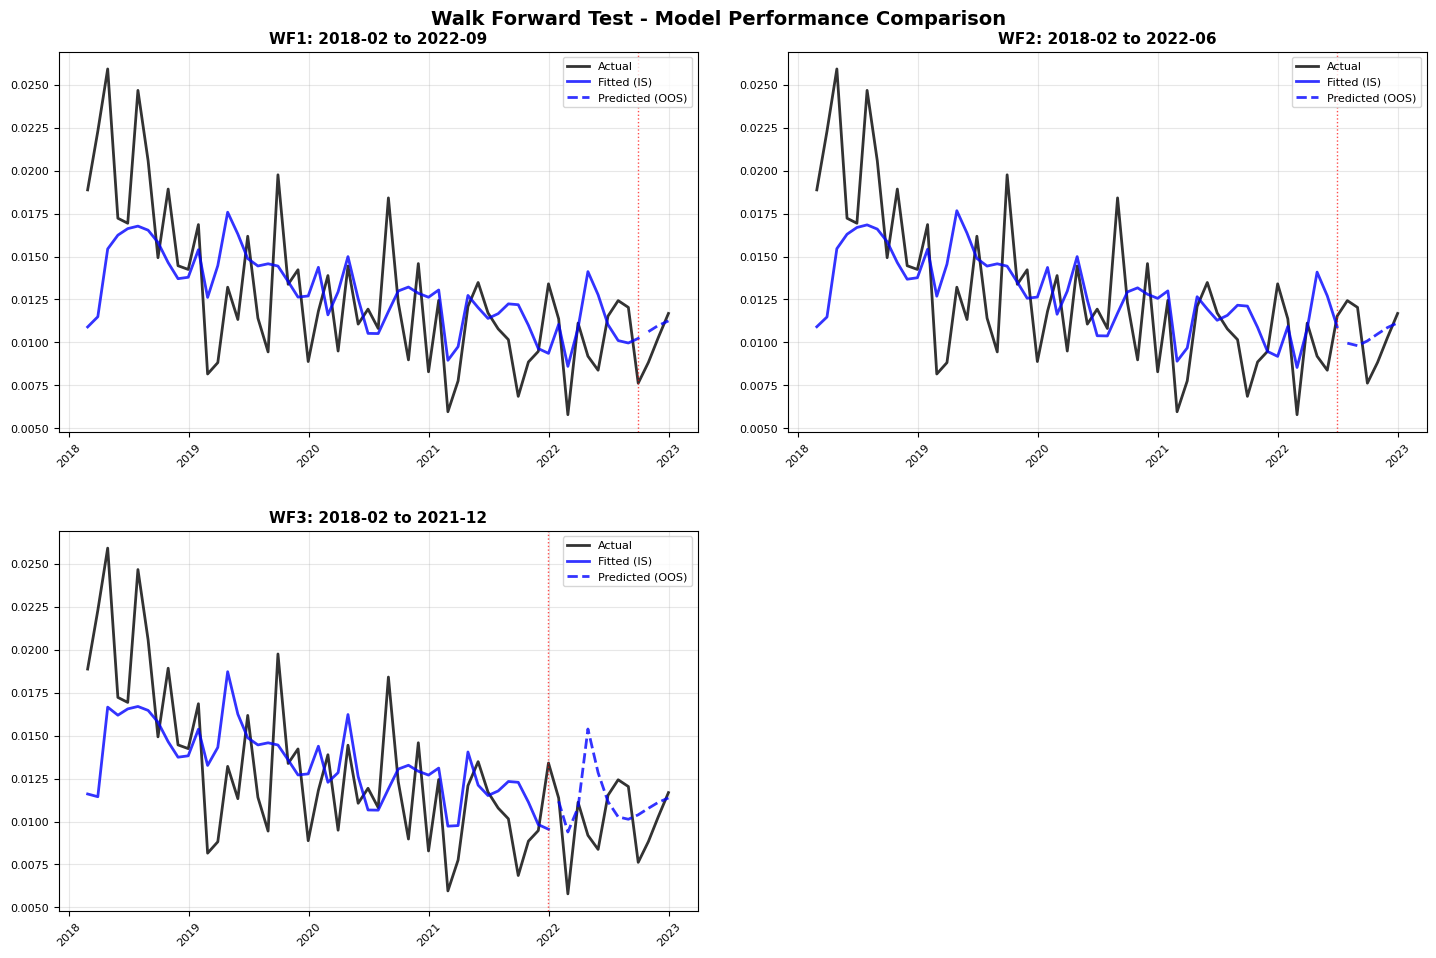

In [37]:
st_test.plot()

=== In-Sample Performance ===
   R²  Adj R²    ME   MAE  RMSE
0.171   0.110 0.010 0.003 0.004

=== Out-of-Sample Performance ===
   ME   MAE  RMSE
0.011 0.005 0.006

=== Model Parameters ===
    Variable        Coef Pvalue  VIF         SE  CI_2_5 CI_97_5
       const      0.0113  0.000  NaN 7.7118e-04  0.0098  0.0129
         M:2     -0.0026  0.283 1.02     0.0024 -0.0075  0.0022
         M:3 -6.5163e-04  0.761 1.02     0.0021 -0.0049  0.0036
         M:4      0.0030  0.178 1.04     0.0022 -0.0014  0.0075
NGDP_BO_func  3.0148e-05  0.074 1.03 1.6552e-05 -0.0000  0.0001


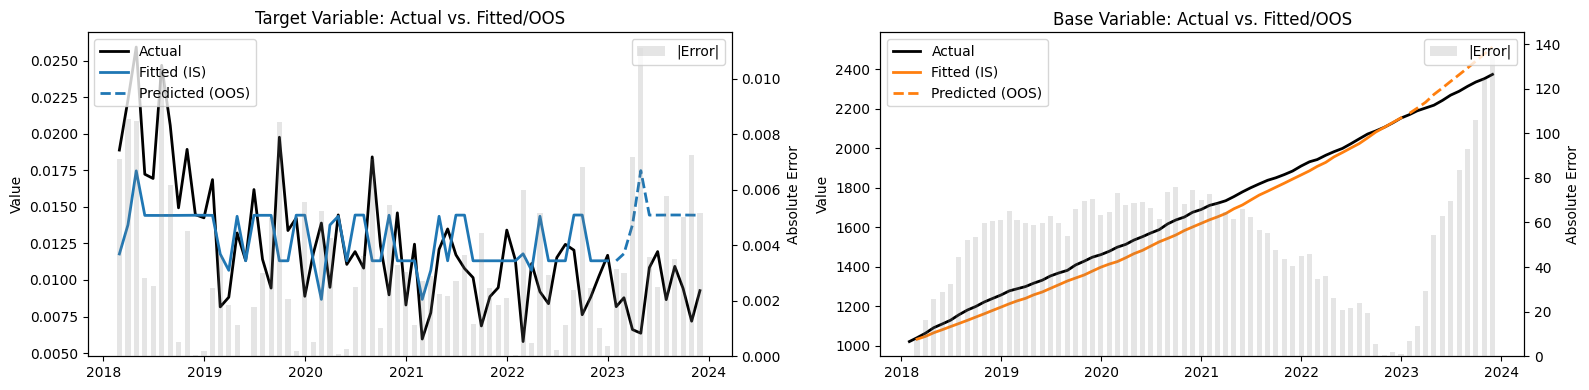

In [38]:
# cm1_b
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance_GR',
    'model_type': tc.Growth,
    'target_base': 'VR_balance',
    'data_manager': dm,
    'model_cls': tc.OLS
}
cm1_b = tc.CM(**cm_config)
# NGDP_bo2 = tc.BO('NGDP', 'VR_balance_GR', cond_thresh=0.0068, cond_thresh_sign='<', effect_periods=2)
NGDP_bo2 = tc.BO('NGDP', 'VR_balance_GR', cond_thresh=0.011, cond_thresh_sign='<', effect_periods=2)

m_dum = tc.DumVar('M', categories=[2,3,4])
indep_vars = [m_dum, NGDP_bo2]
cm1_b.build(indep_vars)
cm1_b.show_report()

In [39]:
cm1_b.model_in.X_full.to_csv('cm1_b_x.csv')
cm1_b.model_in.y_full.to_csv('cm1_b_y.csv')

In [40]:
bo_model = cm1_b.model_in
X_test_1 = bo_model.X_full['2023-01-01':]
X_test_1

,M:2,M:3,M:4,NGDP_BO_func
Date,,,,
2023-01-31,0.0,0.0,0.0,0.0
2023-02-28,1.0,0.0,0.0,0.0
2023-03-31,0.0,1.0,0.0,0.0
2023-04-30,0.0,0.0,1.0,0.0
2023-05-31,0.0,0.0,0.0,0.0
2023-06-30,0.0,0.0,0.0,0.0
2023-07-31,0.0,0.0,0.0,0.0
2023-08-31,0.0,0.0,0.0,0.0
2023-09-30,0.0,0.0,0.0,0.0


In [41]:
X_test_2 = dm.build_features(bo_model.specs, dm.scen_mevs['EWST2024']['Sev'], dm.internal_data)['2023-01-01':'2023-11-30'].astype(float)
X_test_2

,M:2,M:3,M:4,NGDP_BO_func
2023-01-31,0.0,0.0,0.0,0.0
2023-02-28,1.0,0.0,0.0,0.0
2023-03-31,0.0,1.0,0.0,0.0
2023-04-30,0.0,0.0,1.0,0.0
2023-05-31,0.0,0.0,0.0,0.0
2023-06-30,0.0,0.0,0.0,0.0
2023-07-31,0.0,0.0,0.0,0.0
2023-08-31,0.0,0.0,0.0,0.0
2023-09-30,0.0,0.0,0.0,0.0
2023-10-31,0.0,0.0,0.0,0.0


In [42]:
df_internal = dm.internal_data.copy()
df_mev = dm.scen_mevs['EWST2024']['Base']
pred, X_new = bo_model.rolling_predict(df_internal, df_mev, y=bo_model.y_full, time_frame=('2023-01-01', '2023-11-30'))

In [43]:
pred

Date
2023-01-31    0.011311
2023-02-28    0.011796
2023-03-31    0.013784
2023-04-30    0.017478
2023-05-31    0.014435
2023-06-30    0.014437
2023-07-31    0.014441
2023-08-31    0.014444
2023-09-30    0.014443
2023-10-31    0.014436
2023-11-30    0.014429
Name: VR_balance_GR, dtype: float64

In [44]:
X_new

,M:2,M:3,M:4,NGDP_BO_func
2023-01-31,False,False,False,0.000000
2023-02-28,True,False,False,103.624582
2023-03-31,False,True,False,103.620000
2023-04-30,False,False,True,103.606691
2023-05-31,False,False,False,103.611704
2023-06-30,False,False,False,103.670000
2023-07-31,False,False,False,103.796679
2023-08-31,False,False,False,103.900526
2023-09-30,False,False,False,103.870000
2023-10-31,False,False,False,103.646070


In [45]:
X_new.loc[['2023-02-28']]

,M:2,M:3,M:4,NGDP_BO_func
2023-02-28,True,False,False,103.624582


In [46]:
bo_model.predict(X_new.loc[['2023-02-28']])

2023-02-28    0.011796
dtype: object

In [47]:
cm_config = {
    'model_id': 'cm2',
    'target': 'VR_balance',
    'model_cls': tc.OLS,
    'data_manager': dm
}
cm2 = tc.CM(**cm_config)

m_dum = tc.DumVar('M')
indep_vars = [m_dum, 'NGDP', 'CPI', 'PSR']
cm2.build(indep_vars)#, outlier_idx=['2018-04-30', '2018-05-31'])

=== In-Sample Performance ===
   R²  Adj R²      ME     MAE    RMSE
0.753   0.675 484.010 119.492 157.304

=== Out-of-Sample Performance ===
     ME     MAE    RMSE
726.717 280.789 327.238

=== Model Parameters ===
Variable        Coef Pvalue  VIF         SE       CI_2_5     CI_97_5
   const -1.0049e+05  0.000  NaN 11518.1458 -123705.0326 -77278.4376
    NGDP    917.9489  0.000 1.54   103.5644     709.2286   1126.6693
     CPI    -29.9185  0.047 1.55    14.6221     -59.3875     -0.4496
     PSR      0.7188  0.286 1.57     0.6659      -0.6233      2.0609
     M:2    120.7864  0.242 2.18   101.7767     -84.3310    325.9038
     M:3    238.9279  0.071 2.26   129.0786     -21.2128    499.0687
     M:4    187.2599  0.080 2.18   104.5075     -23.3612    397.8810
     M:5     36.1064  0.592 2.08    66.8878     -98.6972    170.9099
     M:6    -75.3161  0.276 2.08    68.2359    -212.8364     62.2042
     M:7    -67.8624  0.265 2.09    60.1324    -189.0514     53.3266
     M:8      3.5266  0.94

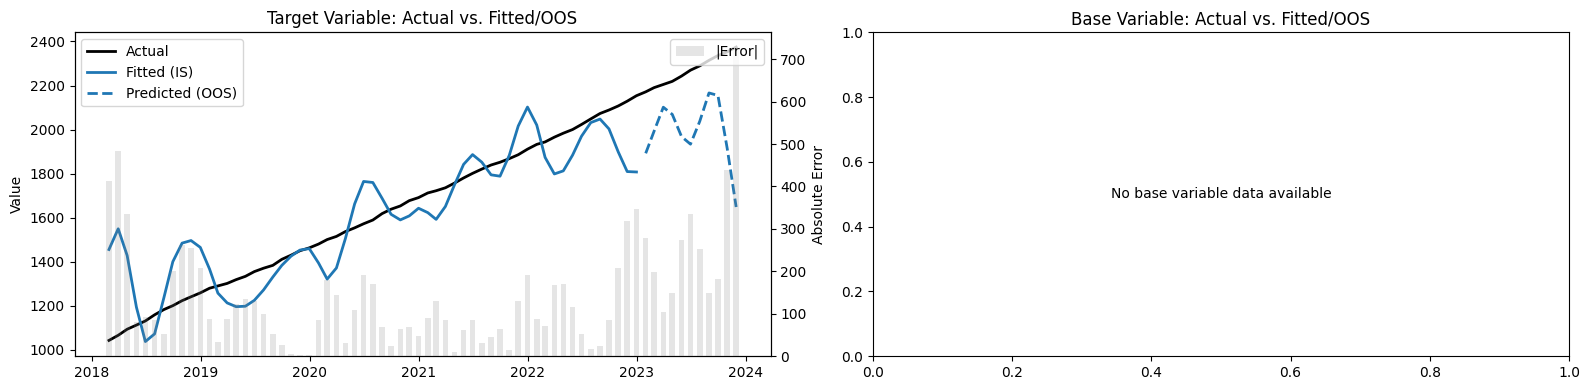


=== Model Testing ===
--- Fit Measures ---
           Value
Metric          
R²      0.753118
Adj R²  0.674564

--- IS Error Measures ---
             Value
Metric            
ME      484.010426
MAE     119.492437
RMSE    157.304419

--- OOS Error Measures ---
             Value
Metric            
ME      726.716993
MAE     280.789255
RMSE    327.237871

--- In-Sample R² ---
Metric
R²    0.753118

--- Coefficient Significance ---
                  P-value  Passed
Coefficient                      
NGDP         2.405776e-11    True
CPI          4.675000e-02    True
PSR          2.862834e-01   False

--- Group Driver F-Test M:2'3'4'5'6'7'8'9'10'11'12 ---
              F-statistic   P-value  Passed
Test                                       
Joint F Test      0.99368  0.466983   False

--- Multicollinearity ---
               VIF
Variable          
NGDP      1.542724
CPI       1.546080
PSR       1.565201
M:2       2.181898
M:3       2.260244
M:4       2.179459
M:5       2.082730
M:6      

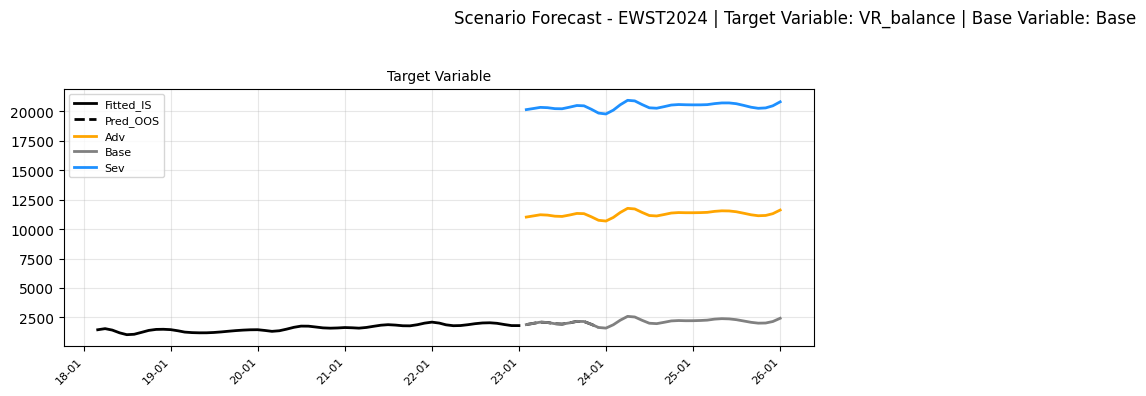

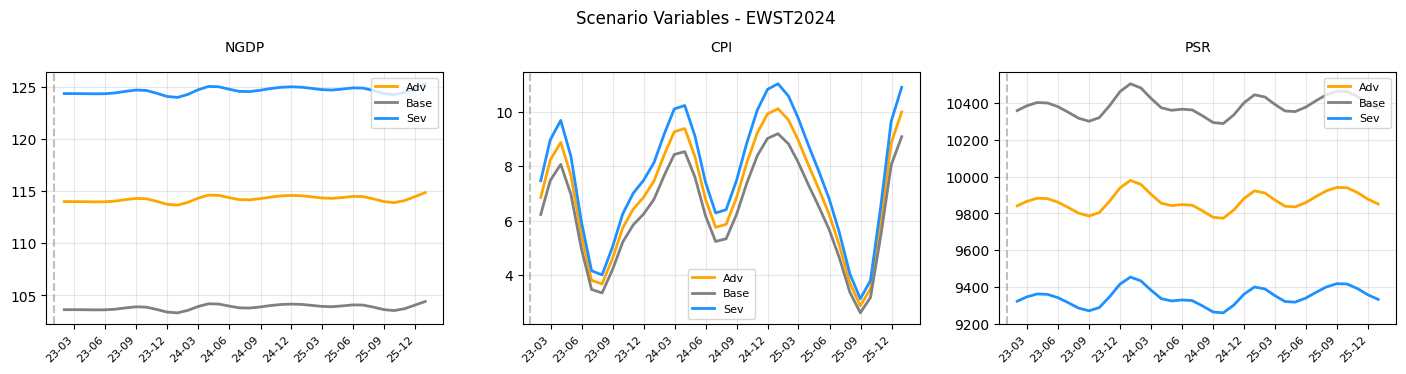

In [48]:
cm2.show_report(show_tests=True, show_scens=True)

### Segment

In [49]:
seg_config = {
    'segment_id': 'VR',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': tc.OLS
}

seg1 = tc.Segment(**seg_config)

In [50]:
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
tsfm_specs_map = dm.build_tsfm_specs(vars_list, max_lag=1, max_periods=2)

e:\OneDrive\Git\Project_LEGO\Technic\data.py:1040: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price'], using raw-only
  warnings.warn(


In [51]:
tsfm_specs_map

{'VR_price': ['VR_price'],
 'Fixed_price': ['Fixed_price'],
 'NGDP': [TSFM:NGDP_LV,
  TSFM:NGDP_LV_L1,
  TSFM:NGDP_MMGR,
  TSFM:NGDP_MMGR_L1,
  TSFM:NGDP_MMGR2,
  TSFM:NGDP_MMGR2_L1],
 'CPI': [TSFM:CPI_LV,
  TSFM:CPI_LV_L1,
  TSFM:CPI_MMDF,
  TSFM:CPI_MMDF_L1,
  TSFM:CPI_MMDF2,
  TSFM:CPI_MMDF2_L1],
 'PSR': [TSFM:PSR_LV,
  TSFM:PSR_LV_L1,
  TSFM:PSR_MMDF,
  TSFM:PSR_MMDF_L1,
  TSFM:PSR_MMDF2,
  TSFM:PSR_MMDF2_L1],
 'PDI': [TSFM:PDI_LV,
  TSFM:PDI_LV_L1,
  TSFM:PDI_MMGR,
  TSFM:PDI_MMGR_L1,
  TSFM:PDI_MMGR2,
  TSFM:PDI_MMGR2_L1]}

In [52]:
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
tsfm_df_map = dm.build_search_vars(vars_list, max_lag=1, max_periods=2)
tsfm_df_map['PDI'] 

,PDI_LV,PDI_LV_L1,PDI_MMGR,PDI_MMGR_L1,PDI_MMGR2,PDI_MMGR2_L1
2000-01-31,8052.188324,NaN,NaN,NaN,NaN,NaN
2000-02-29,8050.619573,8052.188324,-0.000195,NaN,NaN,NaN
2000-03-31,8047.460000,8050.619573,-0.000392,-0.000195,-0.000587,NaN
2000-04-30,8044.386319,8047.460000,-0.000382,-0.000392,-0.000774,-0.000587
2000-05-31,8042.717524,8044.386319,-0.000207,-0.000382,-0.000589,-0.000774
...,...,...,...,...,...,...
2030-08-31,8335.080727,8349.012000,-0.001669,-0.000751,-0.002419,-0.000154
2030-09-30,8319.090000,8335.080727,-0.001918,-0.001669,-0.003584,-0.002419
2030-10-31,8304.242733,8319.090000,-0.001785,-0.001918,-0.003700,-0.003584
2030-11-30,8293.092475,8304.242733,-0.001343,-0.001785,-0.003125,-0.003700


e:\OneDrive\Git\Project_LEGO\Technic\data.py:1040: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price'], using raw-only
  warnings.warn(


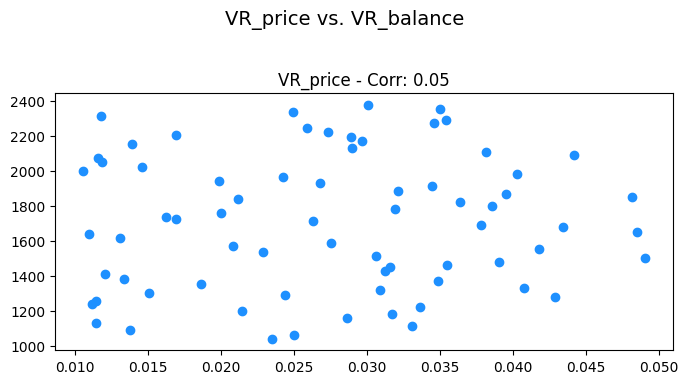

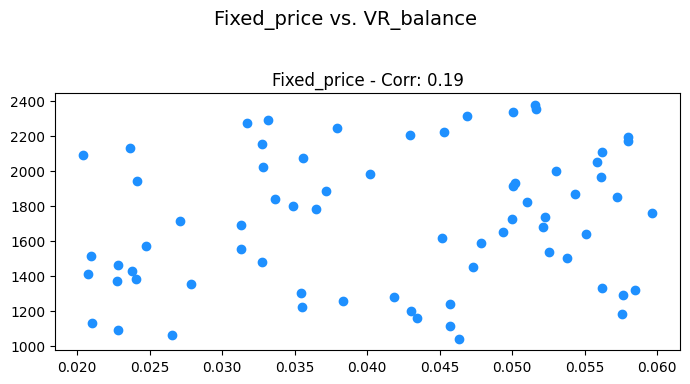

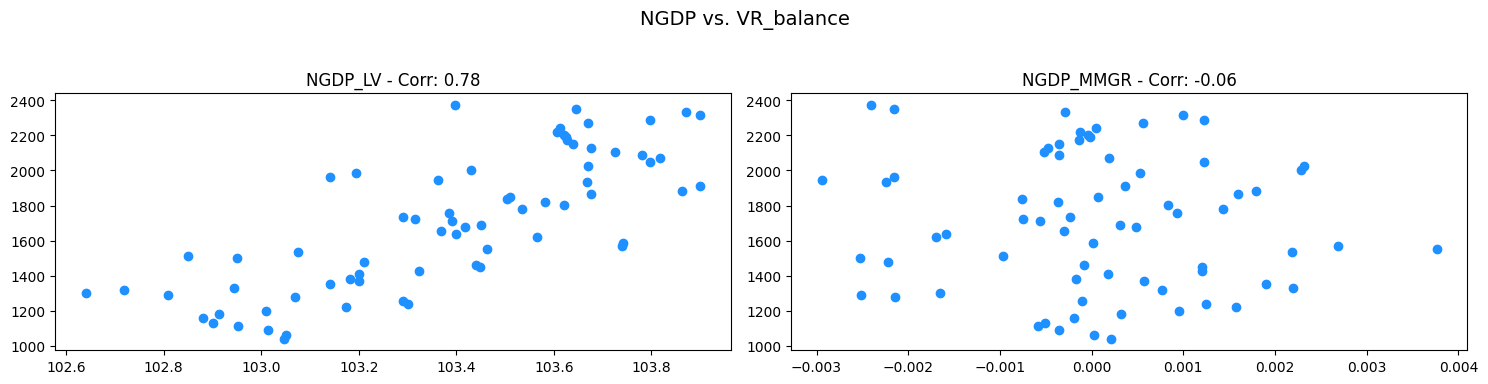

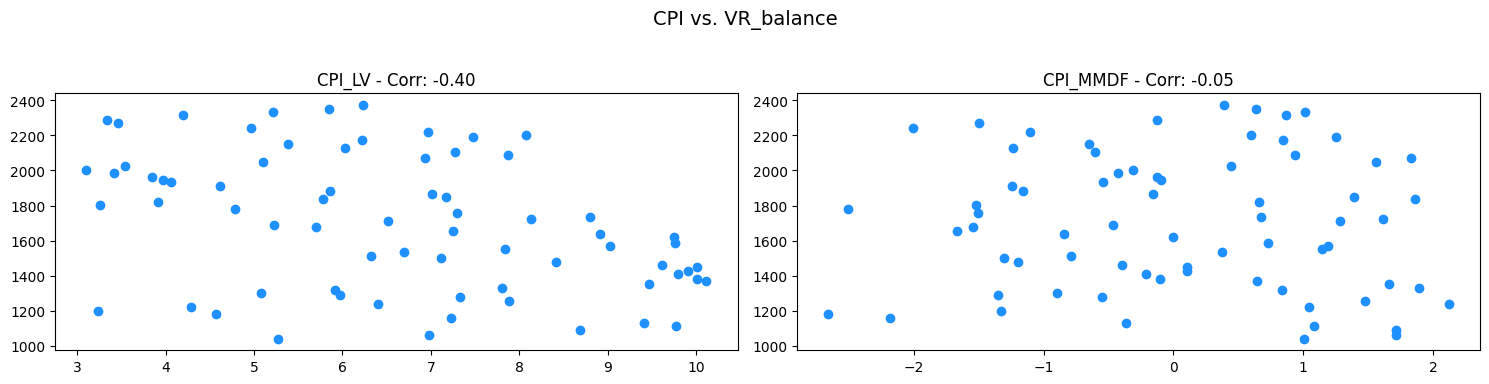

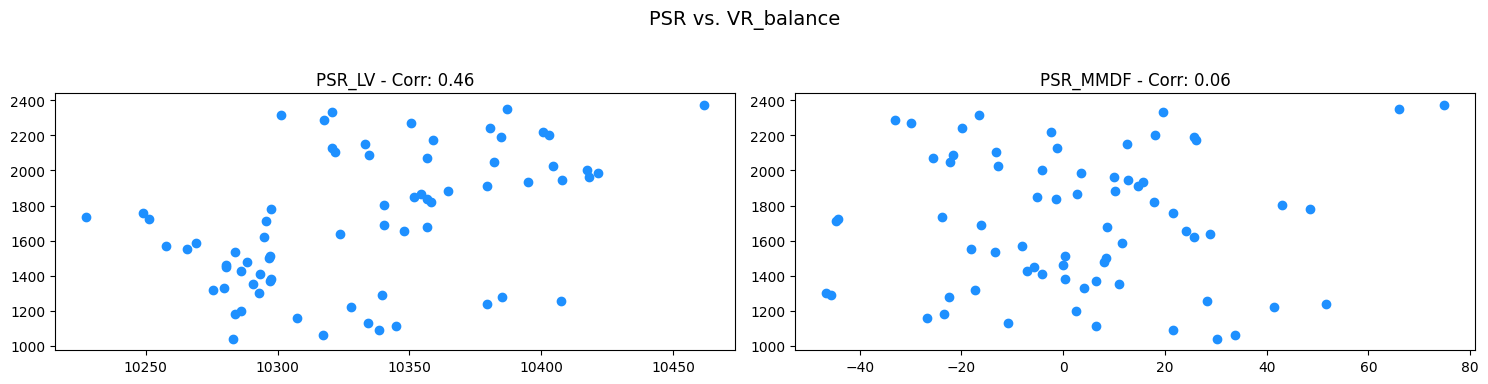

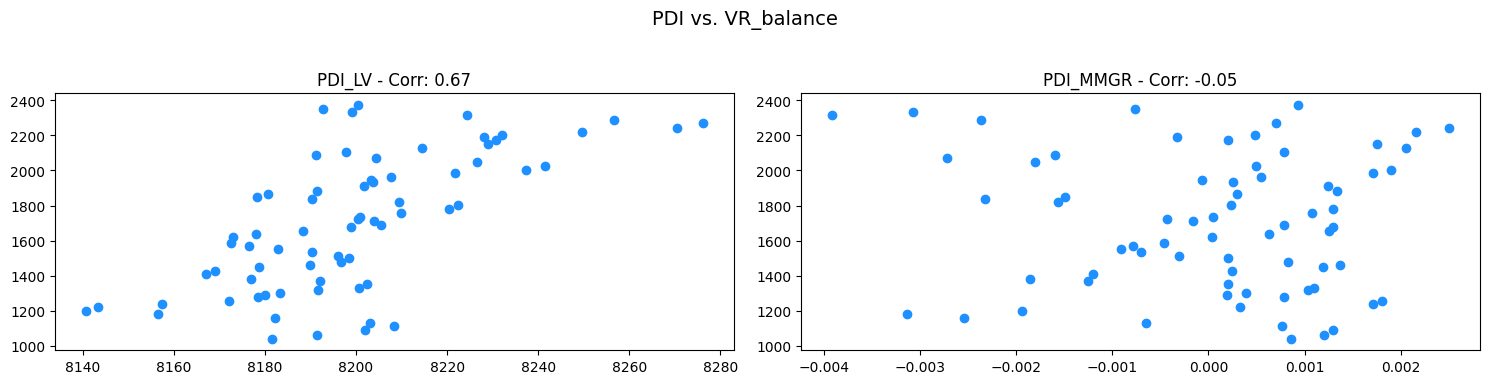

e:\OneDrive\Git\Project_LEGO\Technic\data.py:1040: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price'], using raw-only
  warnings.warn(


,variable,corr,abs_corr
0,NGDP_LV_L2,0.805056,0.805056
1,NGDP_LV_L1,0.801172,0.801172
2,NGDP_LV_L3,0.798770,0.798770
3,NGDP_LV,0.780079,0.780079
4,PDI_LV_L3,0.741463,0.741463
...,...,...,...
109,NGDP_MMGR2_L1,0.009303,0.009303
110,CPI_MMDF6_L3,0.006880,0.006880
111,NGDP_MMGR6_L1,0.006813,0.006813
112,CPI_MMDF12_L3,-0.004070,0.004070


In [53]:
# Explore Vars
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
seg1.explore_vars(vars_list, plot_type='scatter')

In [54]:
forced_in = [tc.DumVar('M')]
desired_pool = ['PDI', 'PSR', 'NGDP']#, 'UNRATE', 'CPI']
seg1.search_cms(desired_pool=desired_pool, forced_in=None)

=== ModelSearch Configuration ===
Target          : VR_balance
Model class     : OLS
Desired pool    : ['PDI', 'PSR', 'NGDP']
Forced in       : []
Sample          : in
Max var num     : 5
Max lag         : 3
Max periods     : 3
Category limit  : 1
Exp sign map    : None
Top N           : 10
Rank weights    : (1, 1, 1)
Test update func: None
Outlier idx     : None


Built 4912 spec combinations.


--- Active Tests of Filtering ---                                                                                       
- Coefficient Significance: filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- In-Sample R²: filter_mode: moderate | desc: Require R² ≥ 0.3.
- Multicollinearity: filter_mode: moderate | desc: Threshold = 10
- Residual Stationarity: filter_mode: moderate | desc: At least half of stationarity tests must pass.
- Sign Check: filter_mode: moderate | desc: All coefficients must have expected signs.
- Y–X Cointegration: filter_mode: moderate | desc: At lea

[]

In [55]:
# seg1.show_report(show_params=True, show_tests=True)

In [56]:
# seg1.cms['cm2'].show_report()

In [57]:
# CM1
indep_vars = ['NGDP']
seg1.build_cm('cm1', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP

In [58]:
# CM2
m_dum = tc.DumVar('M')
indep_vars = [m_dum, 'NGDP']
seg1.build_cm('cm2', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12

In [59]:
from Technic import GR2
# CM3
m_dum = tc.DumVar('M', categories=[2,3,4,5,6,7])
tsfm_var = [TSFM('PSR', 'GR2')]

indep_vars = [m_dum, 'NGDP', tsfm_var]
seg1.build_cm('cm3', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_MMGR2

In [60]:
# seg1.cms['cm3'].model_in.testset.tests[3].test_result

In [61]:
# from TECHNIC import GR2
# # CM4
# m_dum = tc.DumVar('M', mode='group', categories=[(2,3,4),5,6,7])
# tsfm_var = [TSFM('PSR', 'GR2')]

# indep_vars = [m_dum, 'NGDP', tsfm_var]
# seg1.build_cm('cm4', indep_vars)

=== Candidate Models to Report ===
- cm1: OLS-HAC(3):VR_balance~C+NGDP
- cm2: OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12
- cm3: OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_MMGR2


=== In-Sample Performance ===
         R²  Adj R²      ME     MAE    RMSE
Model                                      
cm1   0.582   0.575 513.446 167.665 204.682
cm2   0.686   0.603 506.517 135.983 177.538
cm3   0.709   0.662 396.106 133.229 170.781

=== Out-of-Sample Performance ===


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Metric      ME     MAE    RMSE
Model                         
cm1    724.093 407.900 424.200
cm2    841.290 323.480 382.935
cm3    963.937 354.942 423.198

=== Performance Plot ===


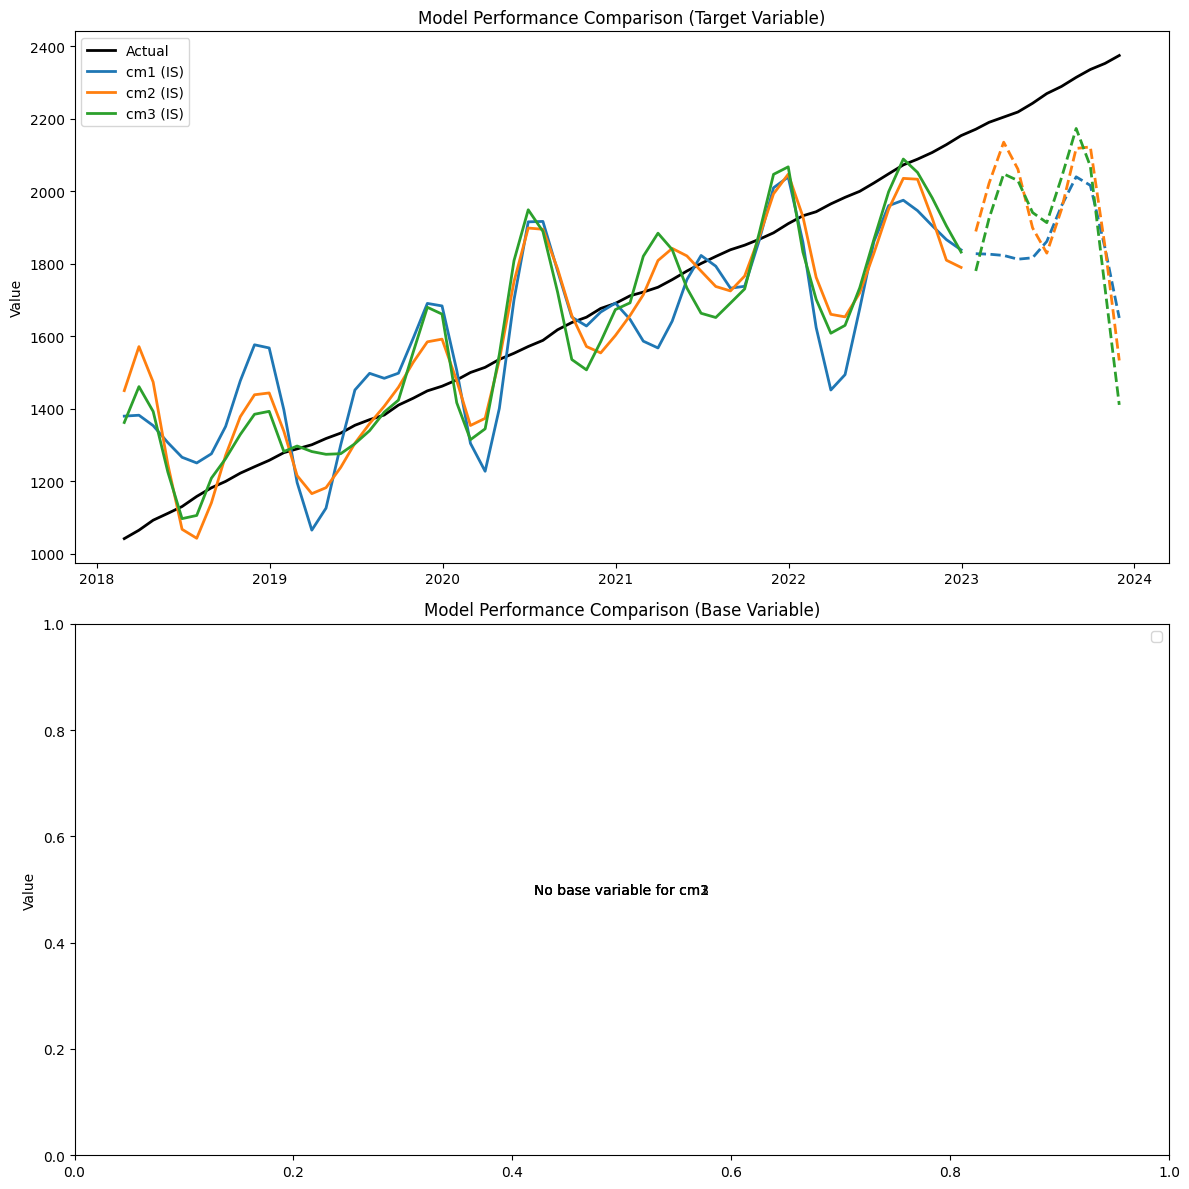


=== Model: cm1 — Parameters ===
  Variable          Coef        Pvalue  VIF            SE         CI_2_5       CI_97_5
0    const -78301.749723  1.092747e-07  NaN  12893.867084 -104121.273180 -52482.226266
1     NGDP    773.255343  6.775415e-08  1.0    124.737787     523.472233   1023.038452

=== Model: cm2 — Parameters ===
   Variable           Coef        Pvalue       VIF            SE         CI_2_5       CI_97_5
0     const -100637.173215  2.046538e-12       NaN  10596.702467 -121967.228935 -79307.117496
1      NGDP     989.385613  1.247820e-12  1.468251    102.525896     783.011689   1195.759537
2       M:2     134.249192  1.929498e-01  2.125486    101.607069     -70.275229    338.773613
3       M:3     252.533010  6.897947e-02  2.194805    135.615040     -20.445906    525.511926
4       M:4     191.299614  1.085522e-01  2.136672    116.893064     -43.993921    426.593148
5       M:5      24.256066  7.716707e-01  2.065070     83.095390    -143.006279    191.518410
6       M:6    

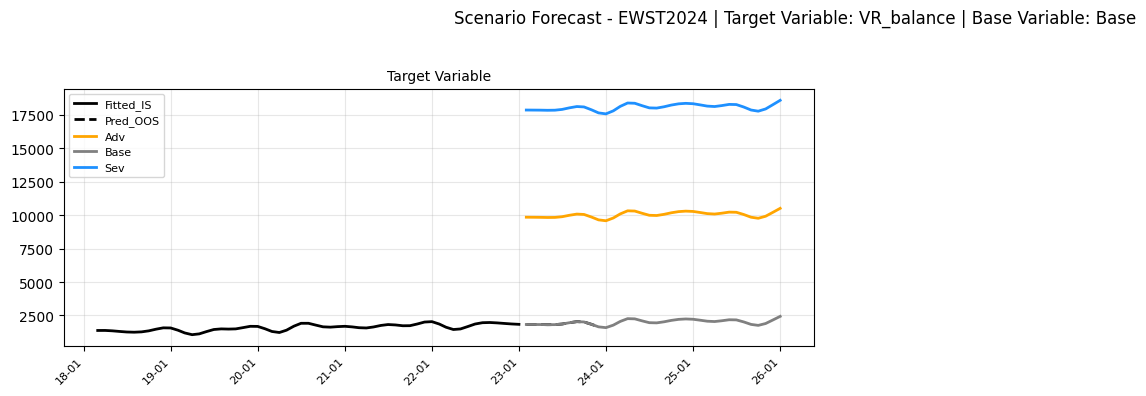

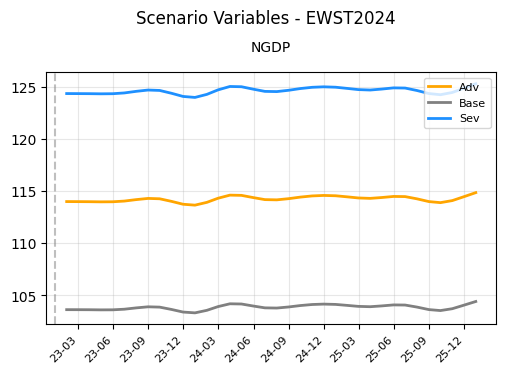


=== Model: cm2 — Scenario Analysis ===
Scenario plots for EWST2024 generated successfully.


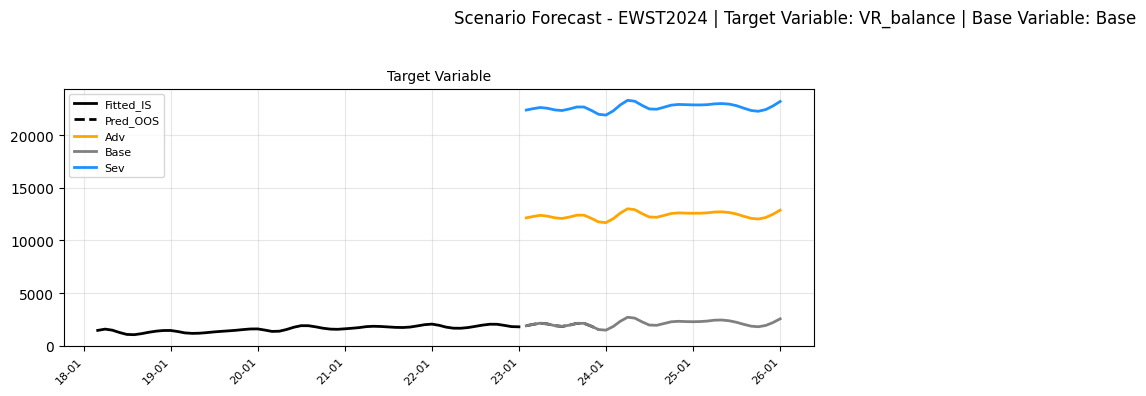

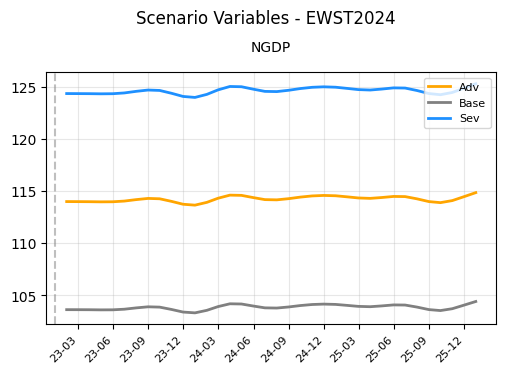


=== Model: cm3 — Scenario Analysis ===
Scenario plots for EWST2024 generated successfully.


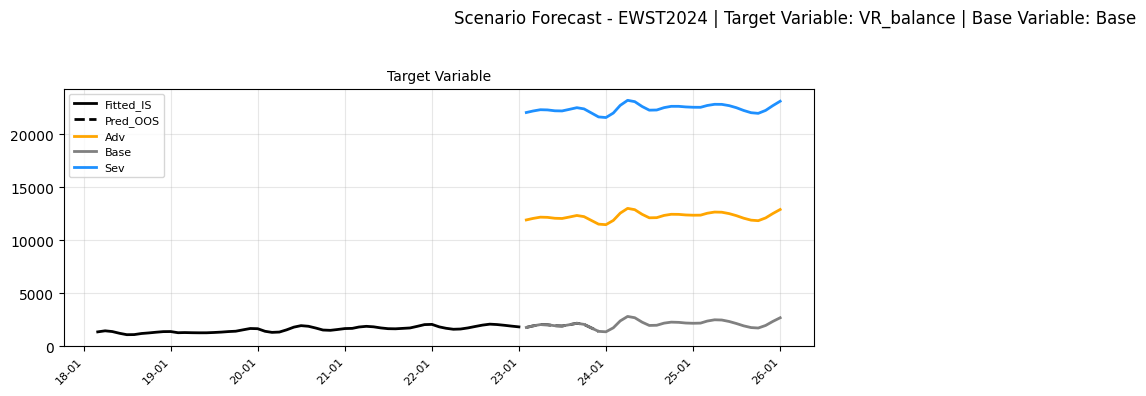

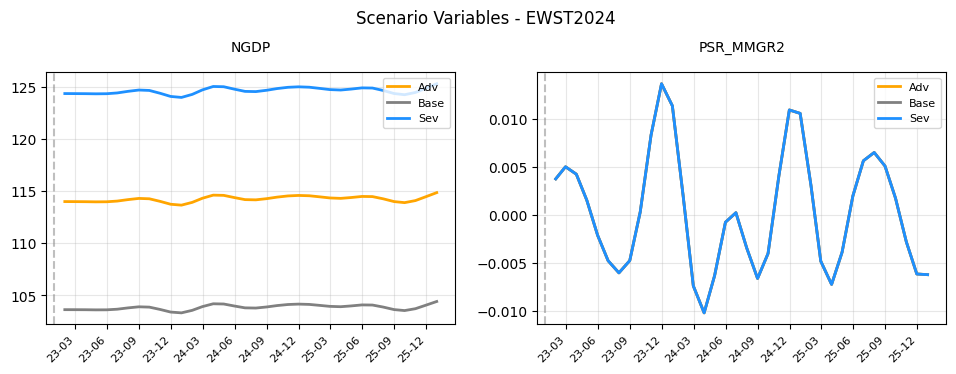

In [62]:
seg1.show_report(show_params=True, show_tests=True, show_scens=True)

In [63]:
vr_95 = seg1.dm.internal_data['VR_balance'].quantile(0.90)
vr_95

2218.766721015874

In [64]:
from Technic import CondVar, BO
#cm4 with CondVars
mth_var = [tc.DumVar('M', categories=[2,3,4,5,6,7])]
tsfm_var = [TSFM('PSR', GR2)]
cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

indep_vars = [mth_var, 'NGDP', tsfm_var, cond_var]
seg1.build_cm('cm4', indep_vars)

TypeError: __init__() got an unexpected keyword argument 'threshold'

In [ ]:
(seg1.cms['cm4'].model_full.y > vr_95).loc[lambda x: x==1]

Date
2023-05-31    True
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, Name: VR_balance, dtype: bool

In [ ]:
tf = (seg1.cms['cm4'].model_full.X.VR_price_BO - seg1.dm.internal_data.VR_price) != 0
tf.loc[lambda x: x==1]

Date
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, dtype: bool

In [ ]:
cm = seg1.cms['cm4']
cm.model_in.testset.filter_pass(fast_filter=False)

(False,
 ['Coefficient Significance', 'Residual Stationarity', 'Y–X Cointegration'])

In [ ]:
cm.model_in.testset.print_test_info()

Active Tests:
- In-Sample R² | filter_mode: moderate | desc: Require R² ≥ 0.3.
- Coefficient Significance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | filter_mode: moderate | desc: Threshold = 10
- Residual Stationarity | filter_mode: moderate | desc: At least half of stationarity tests must pass.
- Y–X Cointegration | filter_mode: moderate | desc: At least half of tests must show X variables are non-stationary and residuals are stationary.
- Sign Check | filter_mode: moderate | desc: All coefficients must have expected signs.

Inactive Tests:
- Fit Measures
- IS Error Measures
- OOS Error Measures
- Residual Normality
- Residual Autocorrelation
- Residual Heteroscedasticity
- Y Stationarity

Note: These tests are included but not turned on. Set `filter_on=True` on a test to include it in filter_pass results.


### Test

In [ ]:
seg1.cms['cm4'].model_in.testset.filter_pass(fast_filter=False)

(False,
 ['Common Driver Significance',
  "Group Driver F-Test M:2'3'4'5'6'7",
  'Residual Stationarity'])

# Test Export

In [ ]:
seg1.export(model_ids=['cm1','cm3','cm4'], content=['test_results'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 3
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: test_results

Preparing export...

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


In [ ]:
seg1.export(model_ids=['cm3'], content=['timeseries_data', 'staticStats'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 1
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: staticStats, timeseries_data

Preparing export...

Successfully exported model statistics to /Users/kexinz8/Project_LEGO/staticStats.csv

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


In [ ]:
seg1.export(model_ids=['cm1'], content=['timeseries_data', 'staticStats'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 1
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: staticStats, timeseries_data

Preparing export...

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


## Search

In [ ]:
mdlsrch_config = {
    'dm': dm,
    'target': 'VR_balance',
    'model_cls': tc.OLS
}

srch = tc.ModelSearch(**mdlsrch_config)

In [ ]:
dm.model_mev.head()

nan,NGDP,PSR,PDI,UNRATE,CPI,NGDP-Price,PDI-FixBal,M,Q
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,NaN,NaN,3,1
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059,NaN,NaN,4,2
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845,NaN,NaN,5,2
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000,NaN,NaN,6,2
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583,NaN,NaN,7,3


In [ ]:
forced_in = [tc.DumVar('M', categories=[2,3,4])]
desired_pool = [('PDI', 'PSR'), ['NGDP', tc.DumVar('M', categories=[2,3,4])], {'UNRATE', 'CPI', 'VR_price',}]

srch.build_spec_combos(forced_in=None, desired_pool=desired_pool, max_var_num=4, max_lag=2, max_periods=2)
srch.all_specs

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


[[('PDI', 'PSR')],
 [['NGDP', DumVar:M:2'3'4]],
 [TSFM:CPI_LV],
 [TSFM:CPI_LV_L1],
 [TSFM:CPI_LV_L2],
 [TSFM:CPI_DF],
 [TSFM:CPI_DF_L1],
 [TSFM:CPI_DF_L2],
 [TSFM:CPI_DF2],
 [TSFM:CPI_DF2_L1],
 [TSFM:CPI_DF2_L2],
 [TSFM:CPI_GR],
 [TSFM:CPI_GR_L1],
 [TSFM:CPI_GR_L2],
 [TSFM:CPI_GR2],
 [TSFM:CPI_GR2_L1],
 [TSFM:CPI_GR2_L2],
 [TSFM:UNRATE_LV],
 [TSFM:UNRATE_LV_L1],
 [TSFM:UNRATE_LV_L2],
 [TSFM:UNRATE_DF],
 [TSFM:UNRATE_DF_L1],
 [TSFM:UNRATE_DF_L2],
 [TSFM:UNRATE_DF2],
 [TSFM:UNRATE_DF2_L1],
 [TSFM:UNRATE_DF2_L2],
 [TSFM:UNRATE_GR],
 [TSFM:UNRATE_GR_L1],
 [TSFM:UNRATE_GR_L2],
 [TSFM:UNRATE_GR2],
 [TSFM:UNRATE_GR2_L1],
 [TSFM:UNRATE_GR2_L2],
 ['VR_price'],
 [('PDI', 'PSR'), ['NGDP', DumVar:M:2'3'4]],
 [('PDI', 'PSR'), TSFM:CPI_LV],
 [('PDI', 'PSR'), TSFM:CPI_LV_L1],
 [('PDI', 'PSR'), TSFM:CPI_LV_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF],
 [('PDI', 'PSR'), TSFM:CPI_DF_L1],
 [('PDI', 'PSR'), TSFM:CPI_DF_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF2],
 [('PDI', 'PSR'), TSFM:CPI_DF2_L1],
 [('PDI', 'PSR'), TSFM

In [ ]:
passed_cms, failed_info, error_log = srch.filter_specs()

Filtering Specs: 100%|██████████| 127/127 [00:10<00:00, 11.94it/s, estimated_finish=2025-06-15 17:08:31]


In [ ]:
error_log

[]

In [ ]:
failed_info

[([('PDI', 'PSR')], ['In-Sample R²']),
 ([['NGDP', DumVar:M:2'3'4]], ['Residual Stationarity']),
 ([TSFM:CPI_LV], ['In-Sample R²']),
 ([TSFM:CPI_LV_L1], ['In-Sample R²']),
 ([TSFM:CPI_LV_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF], ['In-Sample R²']),
 ([TSFM:CPI_DF_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF2], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR], ['In-Sample R²']),
 ([TSFM:CPI_GR_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR2], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_LV], ['In-Sample R²']),
 ([TSFM:UNRATE_LV_L1], ['In-Sample R²']),
 ([TSFM:UNRATE_LV_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF], ['In-Sample R²']),
 ([TSFM:UNRATE_DF_L1], ['In-Sample R²']),
 ([TSFM:UNRATE_DF_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF2_L1], ['In-Sample R²'])

In [ ]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

passed_cms, failed_info, error_log = srch.filter_specs(test_update_func=test_update_func)

Filtering Specs: 100%|██████████| 127/127 [00:09<00:00, 13.13it/s, estimated_finish=2025-06-15 17:08:41]


In [ ]:
passed_cms

[OLS:VR_balance~C+NGDP+M:2+M:3+M:4,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_LV_L2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_GR]

In [ ]:
error_log

[]

In [ ]:
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))


def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

seg1.cms['cm3'].model_in.load_testset(test_update_func=test_update_func)
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))

(False, ["Group Driver F-Test M:2'3'4'5'6'7", 'Residual Stationarity'])
(False, ["Group Driver F-Test M:2'3'4'5'6'7"])


In [ ]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False},
    'In-Sample R²': {'thresholds':{'strict': 0.8, 'moderate': 0.7}}
    }

    return update_map


forced_in = []
desired_pool = [['PDI', 'PSR'], 'NGDP', {'UNRATE', 'CPI'}, 'VR_price', tc.DumVar('M', categories=[2,3,4])]
seg1.search_cms(desired_pool=desired_pool, forced_in=forced_in, test_update_func=test_update_func, outlier_idx=["2018-04-30", "2018-05-31"])

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


=== ModelSearch Configuration ===
Target          : VR_balance
Model class     : OLS
Desired pool    : [['PDI', 'PSR'], 'NGDP', {'CPI', 'UNRATE'}, 'VR_price', DumVar:M:2'3'4]
Forced in       : []
Sample          : in
Max var num     : 5
Max lag         : 3
Max periods     : 3
Top N           : 10
Rank weights    : (1, 1, 1)
Test update func: <function test_update_func at 0x000001DC47D4F3A0>

Built 7751 spec combinations.

--- Example TestSet Info ---
Active Tests:
- In-Sample R² | category: fit | filter_mode: moderate | desc: Require R² ≥ 0.7.
- Common Driver Significance | category: performance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | category: base | filter_mode: moderate | desc: Threshold = 10
- Residual Normality | category: assumption | filter_mode: moderate | desc: At least half of normality tests must pass.
- Y–X Cointegration | category: assumption | filter_mode: moderate | desc: Require Engle–Granger p-value < 0.10

Ina

Filtering Specs:   0%|          | 8/7751 [00:00<08:57, 14.40it/s, estimated_finish=2025-06-15 17:17:36]

KeyboardInterrupt: 

Filtering Specs:   0%|          | 9/7751 [00:20<08:57, 14.40it/s, estimated_finish=2025-06-15 17:17:36]

In [ ]:
seg1.searcher.analyze_failures()


=== Failed Spec Combinations Analysis ===
Total failed spec combos: 7742

1) Failure counts by test:
                 Test Name  Failure Count
              In-Sample R²           6749
Common Driver Significance            955
         Y–X Cointegration             35
        Residual Normality              3


2) Top 5 most frequent failed tests and their common spec elements:

  Test: In-Sample R²
    Number of combos that failed this test: 6749
    Top 3 spec elements contributing to this failure:
      • VR_price  (appeared in 3375 combos)
      • DumVar:M:2'3'4  (appeared in 3330 combos)
      • ['PDI', 'PSR']  (appeared in 2964 combos)

  Test: Common Driver Significance
    Number of combos that failed this test: 955
    Top 3 spec elements contributing to this failure:
      • ['PDI', 'PSR']  (appeared in 902 combos)
      • VR_price  (appeared in 500 combos)
      • DumVar:M:2'3'4  (appeared in 499 combos)

  Test: Y–X Cointegration
    Number of combos that failed this test:

=== Candidate Models to Report ===
- cm1: OLS:VR_balance~C+NGDP
- cm2: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12
- cm3: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2
- cm4: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2+VR_price_BO
- cm1_2: OLS:VR_balance~C+PDI+PSR+NGDP_LV_L1+UNRATE_LV_L2+M:2+M:3+M:4
- cm2_2: OLS:VR_balance~C+PDI+PSR+NGDP_LV+M:2+M:3+M:4
- cm3_2: OLS:VR_balance~C+NGDP_LV+UNRATE_GR2_L3+M:2+M:3+M:4
- cm4_2: OLS:VR_balance~C+NGDP_LV+UNRATE_DF2_L3+M:2+M:3+M:4
- cm5: OLS:VR_balance~C+NGDP_LV+UNRATE_GR_L3+M:2+M:3+M:4
- cm6: OLS:VR_balance~C+NGDP_LV+UNRATE_DF3_L3+M:2+M:3+M:4
- cm7: OLS:VR_balance~C+NGDP_LV+UNRATE_GR3_L2+M:2+M:3+M:4
- cm8: OLS:VR_balance~C+NGDP_LV+UNRATE_DF3_L2+M:2+M:3+M:4
- cm9: OLS:VR_balance~C+NGDP_LV+UNRATE_GR2_L2+M:2+M:3+M:4


=== In-Sample Performance ===
             r2    adj_r2          me         mae        rmse
Model                                                        
cm1    0.585757  0.578615  522.291195

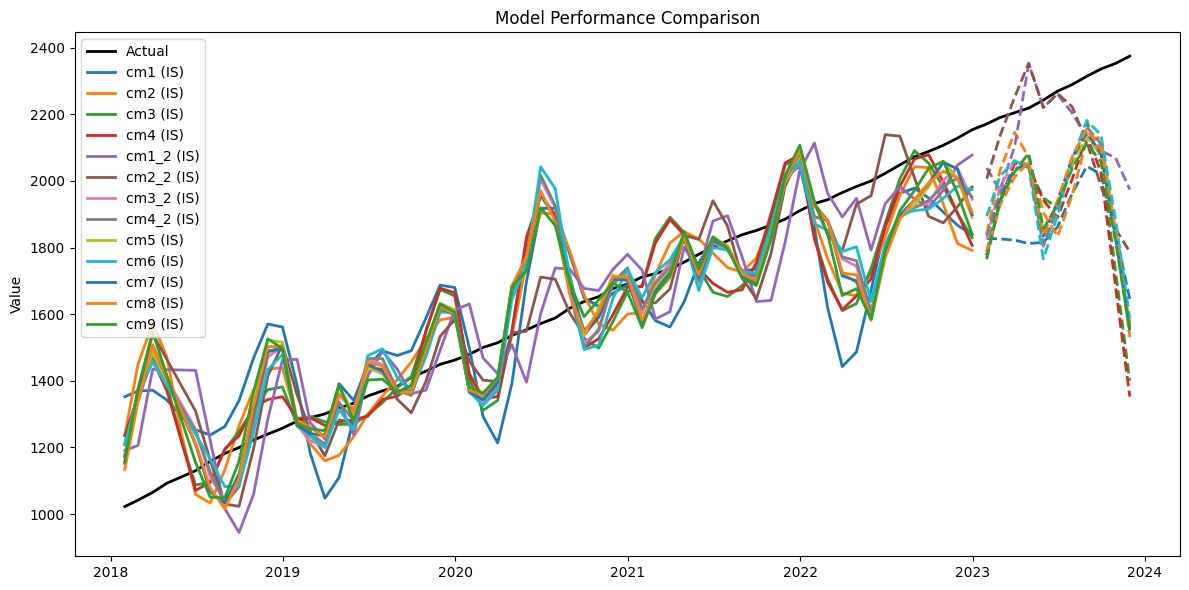


=== Model: cm1 — Testing Metrics ===

--- Fit Measures ---
R²        0.585757
Adj R²    0.578615

--- IS Error Measures ---
ME      522.291195
MAE     169.955421
RMSE    207.529157

--- OOS Error Measures ---
ME      728.482837
MAE     407.558730
RMSE    424.405214

--- In-Sample R² ---
R²    0.585757

--- Common Driver Significance ---
           P-value  Passed
NGDP  6.693432e-08    True

--- Multicollinearity ---
          VIF
Variable     
NGDP      1.0

--- Residual Stationarity ---
       Statistic   P-value  Passed
Test                              
ADF    -0.595801  0.871928   False
PP     -1.757428  0.401793   False
KPSS    0.842360  0.010000   False
ZA           NaN       NaN   False
DFGLS   0.953764  0.918276   False
RUR     1.678293  0.900000    True

--- Residual Normality ---
      Statistic   P-value  Passed
Test                             
JB     1.181627  0.553877    True
SW     0.975336  0.263710    True
KS     0.080475  0.802298    True
CM     0.031041  0.973589   

In [ ]:
seg1.show_report(show_tests=True)

In [ ]:
seg1.searcher.top_cms[0].testset_in.tests[3].thresholds

{'strict': 0.8, 'moderate': 0.7}

### Scenario

In [ ]:
# # Create a Scenario object
# mth_var = [f'M{i}' for i in range(2,5)]
# tsfm_var = [TSFM('PSR', 'GR2')]
# cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

# scen_config = {
#     'dm': dm,
#     'model': cm.model_in,
#     'specs': [mth_var, 'NGDP', tsfm_var, cond_var],
#     'P0': '2023-08-31'
# }
# scen = tc.Scenario(**scen_config)
# y_scens = scen.y_scens

In [ ]:
# y_scens['fake_scens']['base'].dropna()

In [ ]:
# y_scens['fake_scens']['adv'].dropna()